In [ ]:
import io
import zipfile
import numpy as np
import pandas as pd
from typing import List
from fastapi import FastAPI
from fastapi.middleware.cors import CORSMiddleware
from fastapi.responses import StreamingResponse
import dotenv
import pendulum
from datetime import timedelta
from pydantic import BaseModel
from sqlalchemy import create_engine, asc, or_
from sqlalchemy.orm import sessionmaker
from config import Settings
from models import MessageSql
import matplotlib.pyplot as plt

settings = Settings(_env_file=dotenv.find_dotenv())
valid_password = settings.visualizer_api_password.get_secret_value()
engine = create_engine(settings.db_url.get_secret_value())
Session = sessionmaker(bind=engine)
session = Session()

house_alias = 'fir'
timezone = "America/New_York"
start = pendulum.datetime(2024, 11, 5, 0, 0, tz=timezone)
end = pendulum.datetime(2024, 11, 6, 23, 30, tz=timezone)
start_ms = int(start.timestamp() * 1000)
end_ms = int(end.timestamp() * 1000)

messages = session.query(MessageSql).filter(
    # MessageSql.from_alias.like(f'%{house_alias}%'),
    MessageSql.message_type_name == "gridworks.event.problem",
    MessageSql.message_persisted_ms >= start_ms,
    MessageSql.message_persisted_ms <= end_ms,
).order_by(asc(MessageSql.message_persisted_ms)).all()

Error in fir at time 2024-11-05T14:47:56.576000+00:00
Error in fir at time 2024-11-05T14:47:56.597000+00:00
Error in fir at time 2024-11-05T14:47:56.604000+00:00
Error in fir at time 2024-11-06T21:52:36.932000+00:00
Error in fir at time 2024-11-06T21:52:36.957000+00:00
Error in fir at time 2024-11-06T21:52:36.963000+00:00


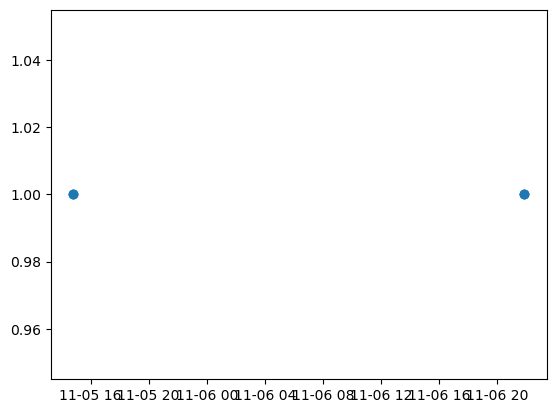

In [10]:
error_messages = []
for message in messages:
    error_messages.append(pendulum.from_timestamp(message.message_persisted_ms/1000))
    print(f"Error in {message.from_alias.split('.')[-2]} at time {error_messages[-1]}")

plt.scatter(error_messages, [1]*len(error_messages)) 
# plt.xlim([pendulum.from_timestamp(start_ms/1000),
        #   pendulum.from_timestamp(end_ms/1000)])
plt.show()